<a href="https://colab.research.google.com/github/UriKialy/intro-to-deep-learning-pytorch-udacity/blob/main/Part_4_Fashion_MNIST_(Exercises).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper


# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 26.4M/26.4M [00:01<00:00, 15.9MB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 278kB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.95MB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.25MB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



Here we can see one of the images.

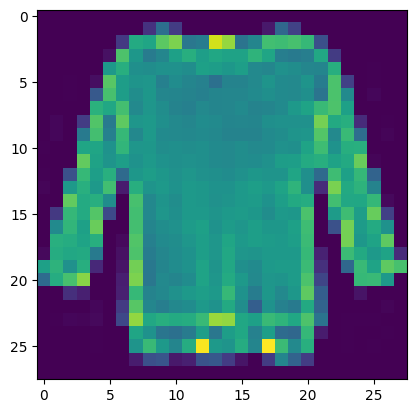

In [4]:
import matplotlib.pyplot as plt

# Display the image
img = image[0].numpy().transpose(1, 2, 0)  # Convert from Tensor to NumPy array and transpose channels
plt.imshow(img)
plt.show()


## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [5]:
from torch import nn
import torch.nn.functional as F
# TODO: Define your network architecture here
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.Tanh(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 32),
                      nn.ELU(),
                      nn.Linear(32,10),
                      nn.LogSoftmax(dim=1))


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [6]:
# TODO: Create the network, define the criterion and optimizer

# Define the loss
criterion = nn.NLLLoss()
# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)


In [8]:
# TODO: Train the network here
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # TODO: Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 1.5981956938309456
Training loss: 0.7159409270738997
Training loss: 0.5649139709881882
Training loss: 0.4970892055837839
Training loss: 0.4545736719391493
Training loss: 0.4237805633529671
Training loss: 0.4011212863298113
Training loss: 0.38365370761960554
Training loss: 0.36837926916857516
Training loss: 0.35461182271176056


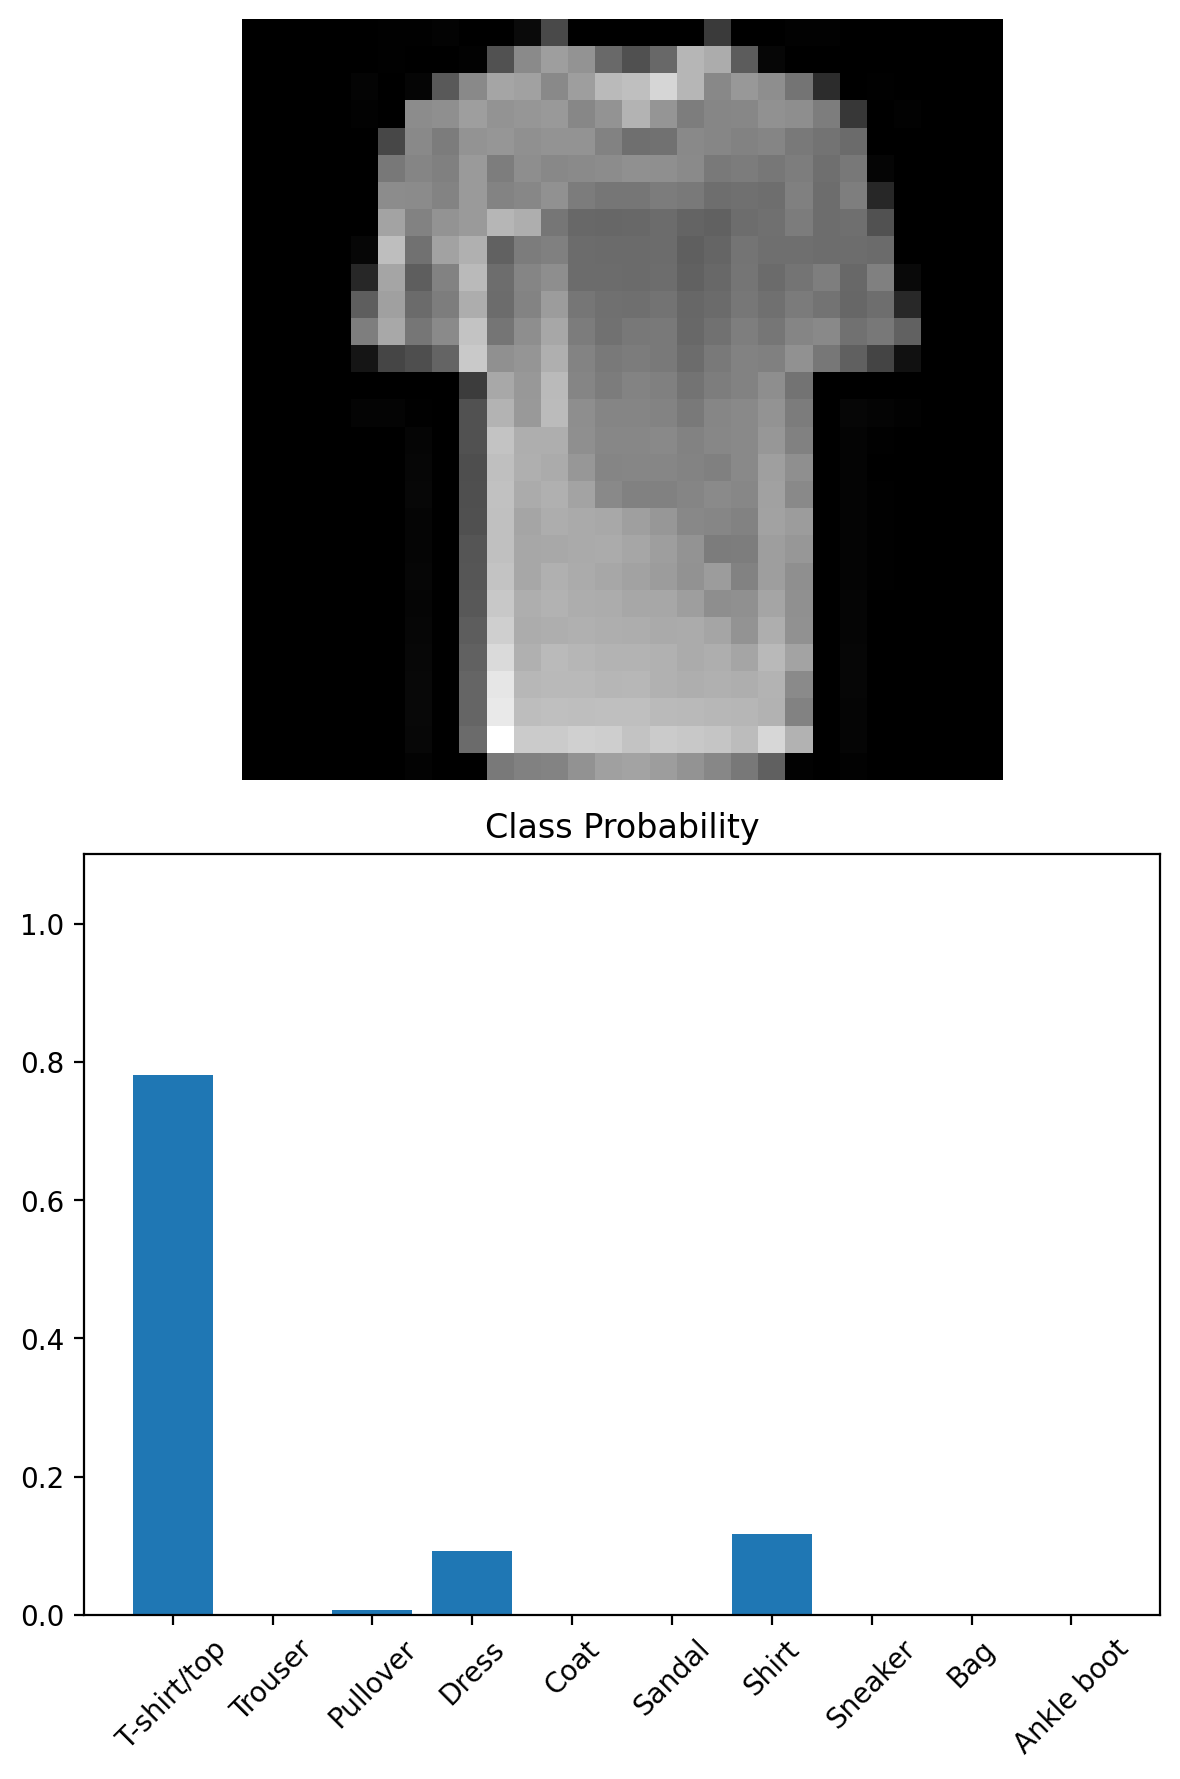

In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# Get a test image and label
images, labels = next(iter(testloader))
img = images[0]
label = labels[0]

# Flatten the image (1D vector of size 784)
img = img.view(1, 784)

# Forward pass to get the logits (raw output from the network)
logits = model(img)

# Apply softmax to get probabilities
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), nrows=2)

# Display the image reshaped to 28x28
ax1.imshow(img.view(28, 28).numpy().squeeze(), cmap='gray')
ax1.axis('off')

# Ensure ps is 10 values (probabilities for each class)
ps = ps.detach().numpy().squeeze()
if ps.shape != (10,):
    raise ValueError(f"Expected ps shape (10,), got {ps.shape}")

# Plot class probabilities
ax2.bar(np.arange(10), ps)  # Plot bars for 10 classes
ax2.set_xticks(np.arange(10))
ax2.set_xticklabels(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                     'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], rotation=45)
ax2.set_title('Class Probability')
ax2.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()
